# EDA for Black Friday

#### Cleaning and preparing data for model Training

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Problem Statement

A retail company "ABC private Limited" wants to understand the customer purchase behaviour(specifically purchase amount) against 
various different product catefgories. They have shared purchase summart of customer for selected high volume products from last 
month.The dataset contains customer demographic (age,gender,martial status, city type, stay in current city,product details, 
product id and product category) and total purchase amount from last month.

Now they want to build a model to predict the amount of customer against various products which will help them to create a 
personalised offer to customer against different product.


In [2]:
df_train=pd.read_csv('test.csv')
df_test=pd.read_csv('train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [3]:
df_train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
count,2.335990e+05,233599.000000,233599.000000,233599.000000,161255.000000,71037.000000
mean,1.003029e+06,8.085407,0.410070,5.276542,9.849586,12.669454
std,1.726505e+03,6.521146,0.491847,3.736380,5.094943,4.125944
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000
25%,1.001527e+06,2.000000,0.000000,1.000000,5.000000,9.000000
50%,1.003070e+06,7.000000,0.000000,5.000000,9.000000,14.000000
75%,1.004477e+06,14.000000,1.000000,8.000000,15.000000,16.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000


In [4]:
final_df=pd.concat([df_train,df_test])
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [5]:
#dropping a feature
final_df.drop(['User_ID'],axis=1,inplace=True)
#here axis is 1 means dropping a column and axis is 0 me dropping a row

In [6]:
final_df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,NaN
1,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,NaN
2,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN,NaN
3,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN,NaN
4,P00053842,F,26-35,1,C,1,0,4,5.0,12.0,NaN


In [7]:
# converting the categorical data of gender in form of 0 and 1

In [8]:
final_df['Gender']=final_df['Gender'].map({'F':0,'M':1})

In [9]:
final_df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00128942,1,46-50,7,B,2,1,1,11.0,NaN,NaN
1,P00113442,1,26-35,17,C,0,0,3,5.0,NaN,NaN
2,P00288442,0,36-45,1,B,4+,1,5,14.0,NaN,NaN
3,P00145342,0,36-45,1,B,4+,1,4,9.0,NaN,NaN
4,P00053842,0,26-35,1,C,1,0,4,5.0,12.0,NaN


In [10]:
sorted(final_df['Age'].unique())

['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

In [11]:
final_df['Age']=final_df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [12]:
final_df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00128942,1,5,7,B,2,1,1,11.0,NaN,NaN
1,P00113442,1,3,17,C,0,0,3,5.0,NaN,NaN
2,P00288442,0,4,1,B,4+,1,5,14.0,NaN,NaN
3,P00145342,0,4,1,B,4+,1,4,9.0,NaN,NaN
4,P00053842,0,3,1,C,1,0,4,5.0,12.0,NaN


In [13]:
city_df=pd.get_dummies(final_df['City_Category'],drop_first=True)
city_df.head()

,B,C
0,True,False
1,False,True
2,True,False
3,True,False
4,False,True


In [14]:
final_df=pd.concat([final_df,city_df],axis=1)

In [15]:
final_df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00128942,1,5,7,B,2,1,1,11.0,NaN,NaN,True,False
1,P00113442,1,3,17,C,0,0,3,5.0,NaN,NaN,False,True
2,P00288442,0,4,1,B,4+,1,5,14.0,NaN,NaN,True,False
3,P00145342,0,4,1,B,4+,1,4,9.0,NaN,NaN,True,False
4,P00053842,0,3,1,C,1,0,4,5.0,12.0,NaN,False,True


In [16]:
final_df.drop('City_Category',axis=1,inplace=True)

In [17]:
final_df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00128942,1,5,7,2,1,1,11.0,NaN,NaN,True,False
1,P00113442,1,3,17,0,0,3,5.0,NaN,NaN,False,True
2,P00288442,0,4,1,4+,1,5,14.0,NaN,NaN,True,False
3,P00145342,0,4,1,4+,1,4,9.0,NaN,NaN,True,False
4,P00053842,0,3,1,1,0,4,5.0,12.0,NaN,False,True


## Missing value

In [18]:
# Missing values
final_df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [19]:
final_df['Product_Category_2'].unique()

array([11.,  5., 14.,  9.,  3.,  4., 13.,  2., nan,  8., 15., 17., 12.,
       16.,  6., 10., 18.,  7.])

In [20]:
final_df['Product_Category_2'].value_counts()

Product_Category_2
8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: count, dtype: int64

In [21]:
final_df['Product_Category_2'].mode()

0    8.0
Name: Product_Category_2, dtype: float64

In [22]:
#Replace the the missing value with mode
final_df['Product_Category_2']=final_df['Product_Category_2'].fillna(final_df['Product_Category_2'].mode()[0])

In [23]:
final_df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [24]:
final_df['Product_Category_3'].unique()

array([nan, 12., 15.,  9., 16., 14.,  4.,  3.,  5.,  8., 17., 13., 11.,
       10.,  6., 18.])

In [25]:
final_df['Product_Category_3'].value_counts()

Product_Category_3
16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: count, dtype: int64

In [26]:
final_df['Product_Category_3'].mode()[0]

16.0

In [27]:
#replace the missing values for product_category_3
final_df['Product_Category_3']=final_df['Product_Category_3'].fillna(final_df['Product_Category_3'].mode()[0])

In [28]:
final_df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [29]:
final_df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00128942,1,5,7,2,1,1,11.0,16.0,NaN,True,False
1,P00113442,1,3,17,0,0,3,5.0,16.0,NaN,False,True
2,P00288442,0,4,1,4+,1,5,14.0,16.0,NaN,True,False
3,P00145342,0,4,1,4+,1,4,9.0,16.0,NaN,True,False
4,P00053842,0,3,1,1,0,4,5.0,12.0,NaN,False,True


In [30]:
final_df['Stay_In_Current_City_Years']=final_df['Stay_In_Current_City_Years'].str.replace('+','')

In [31]:
final_df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00128942,1,5,7,2,1,1,11.0,16.0,NaN,True,False
1,P00113442,1,3,17,0,0,3,5.0,16.0,NaN,False,True
2,P00288442,0,4,1,4,1,5,14.0,16.0,NaN,True,False
3,P00145342,0,4,1,4,1,4,9.0,16.0,NaN,True,False
4,P00053842,0,3,1,1,0,4,5.0,12.0,NaN,False,True


In [32]:
final_df['Stay_In_Current_City_Years'].unique()

array(['2', '0', '4', '1', '3'], dtype=object)

##### converting object into int

In [33]:
final_df['Stay_In_Current_City_Years']=final_df['Stay_In_Current_City_Years'].astype(int)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  bool   
 11  C                           783667 non-null  bool   
dtypes: bool(2), float64(3), int32(1), int64(5), object(1)
memory usage: 64.3+ MB


In [34]:
final_df['B']=final_df['B'].astype(int)
final_df['C']=final_df['C'].astype(int)
final_df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00128942,1,5,7,2,1,1,11.0,16.0,NaN,1,0
1,P00113442,1,3,17,0,0,3,5.0,16.0,NaN,0,1
2,P00288442,0,4,1,4,1,5,14.0,16.0,NaN,1,0
3,P00145342,0,4,1,4,1,4,9.0,16.0,NaN,1,0
4,P00053842,0,3,1,1,0,4,5.0,12.0,NaN,0,1


In [54]:
final_df['Product_Category_1'].value_counts()

Product_Category_1
5     215950
1     200699
8     162294
11     34440
2      34056
6      29326
3      28791
4      16756
16     13933
15      8984
13      7930
10      7373
12      5610
7       5345
18      4436
20      2550
14      2186
19      1603
17       801
9        604
Name: count, dtype: int64

# Visualization

#### AGE Vs Purchase over Gender

<Axes: xlabel='Age', ylabel='Purchase'>

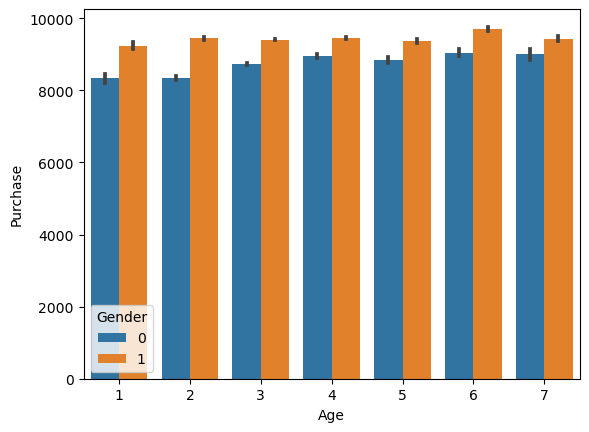

In [53]:
sns.barplot(final_df,x='Age',y='Purchase',hue='Gender')

## Male have more puchase than women in all age groups and maximum in 51-55 age group

##### Purchase Vs Occupation

<Axes: xlabel='Occupation', ylabel='Purchase'>

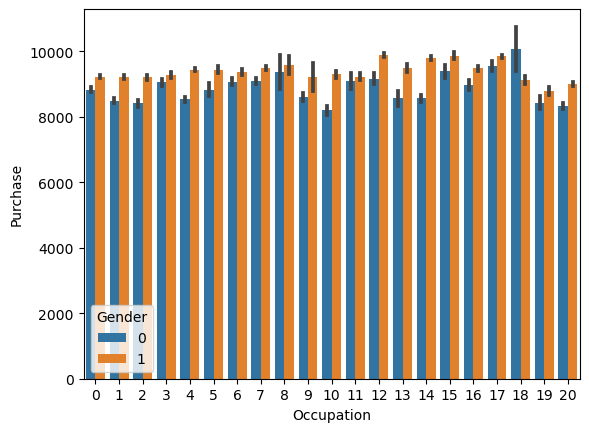

In [42]:
sns.barplot(final_df,x='Occupation',y='Purchase',hue='Gender')

##### Purchase Vs product_category_1

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

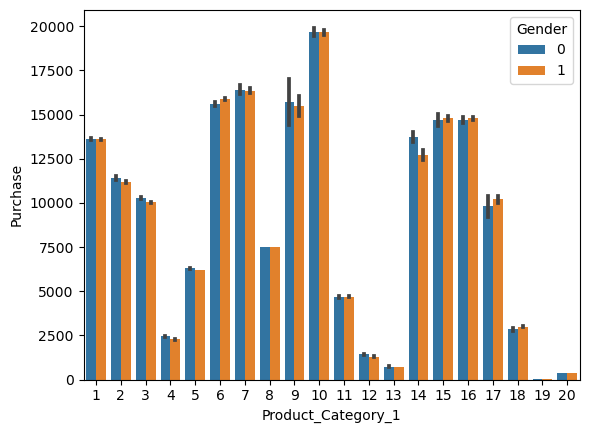

In [52]:
sns.barplot(final_df,x='Product_Category_1',y='Purchase',hue='Gender')

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

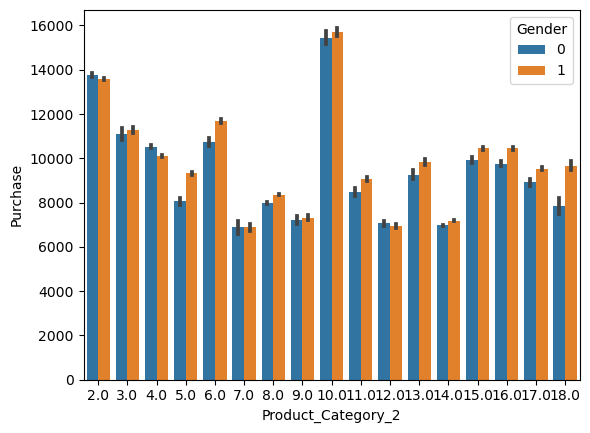

In [55]:
sns.barplot(final_df,x='Product_Category_2',y='Purchase',hue='Gender')

### Feature scaling

In [67]:
df_test=final_df[final_df['Purchase'].isnull()]
df_test


0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
233594   NaN
233595   NaN
233596   NaN
233597   NaN
233598   NaN
Name: Purchase, Length: 233599, dtype: float64

In [72]:
df_train=final_df[~final_df['Purchase'].isnull()]
df_train
X=df_train.drop('Purchase',axis=1)
X


,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
550063,P00372445,1,6,13,1,1,20,8.0,16.0,1,0
550064,P00375436,0,3,1,3,0,20,8.0,16.0,0,1
550065,P00375436,0,3,15,4,1,20,8.0,16.0,1,0
550066,P00375436,0,7,1,2,0,20,8.0,16.0,0,1


In [73]:
y=df_train['Purchase']
y

0          8370.0
1         15200.0
2          1422.0
3          1057.0
4          7969.0
           ...   
550063      368.0
550064      371.0
550065      137.0
550066      365.0
550067      490.0
Name: Purchase, Length: 550068, dtype: float64

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [85]:
# X_train.drop('Product_ID',axis=1,inplace=True)
X_test.drop('Product_ID',axis=1,inplace=True)

In [88]:
#feature scalin
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
x_test=sc.transform(X_test)
X_test

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
84432,1,6,19,3,0,1,2.0,16.0,0,1
72724,0,4,11,1,0,1,15.0,16.0,1,0
197032,0,4,0,2,1,8,15.0,16.0,0,0
353704,1,2,4,3,0,1,15.0,16.0,0,0
91198,1,2,4,0,0,6,8.0,16.0,1,0
...,...,...,...,...,...,...,...,...,...,...
196106,1,4,0,1,1,8,8.0,16.0,1,0
109474,0,4,1,1,0,11,15.0,16.0,0,1
433228,1,2,2,2,0,3,5.0,16.0,0,1
271831,1,4,7,1,0,1,2.0,15.0,0,1


## train your model